In [1]:
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

/home/mayank/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('mnist_data/')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [3]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')

In [4]:
training_digits, training_labels = mnist.train.next_batch(10000)
test_digits, test_labels = mnist.test.next_batch(200)

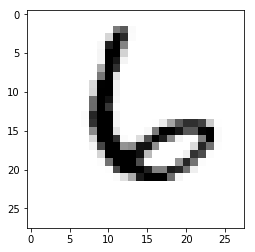

In [5]:
display_digit(training_digits[1])

In [6]:
training_labels[:5]

array([1, 6, 1, 0, 5], dtype=uint8)

In [7]:
tf.reset_default_graph()

In [8]:
training_digit_pl = tf.placeholder('float', [None, 784])

test_digit_pl = tf.placeholder('float', [784])

In [9]:
def get_majority_predicted_label(labels, indices):
    
    predicted_labels = []
    for i in indices:
        predicted_labels.append(labels[i])
        
    predicted_labels = np.array(predicted_labels)
    
    print(predicted_labels)
    counts = np.bincount(predicted_labels)
    
    return np.argmax(counts)

In [10]:
l1_distance = tf.abs(tf.subtract(training_digit_pl, test_digit_pl))

distance_l1 = tf.reduce_sum(l1_distance, axis = 1)

pred_knn_l1 = tf.nn.top_k(tf.negative(distance_l1), k = 5)

In [11]:
accuracy = 0.

In [12]:
init = tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(len(test_digits)):
        _, indices = sess.run(pred_knn_l1, 
                             feed_dict = {training_digit_pl : training_digits,
                                          test_digit_pl : test_digits[i, :]})
        
        predicted_label = get_majority_predicted_label(training_labels, indices)
        
        print('For Image ', i, 'Actual Label : ', test_labels[i],' and the Predicted label : ',predicted_label)
        
        if predicted_label == test_labels[i]:
            accuracy += 1./len(test_digits)
            
    print('Done!.....')
    print('Accuracy : ',accuracy)

[8 8 8 8 3]
For Image  0 Actual Label :  8  and the Predicted label :  8
[2 2 2 2 2]
For Image  1 Actual Label :  2  and the Predicted label :  2
[3 3 3 3 3]
For Image  2 Actual Label :  3  and the Predicted label :  3
[8 8 3 8 0]
For Image  3 Actual Label :  8  and the Predicted label :  8
[4 4 4 4 4]
For Image  4 Actual Label :  4  and the Predicted label :  4
[9 9 9 9 9]
For Image  5 Actual Label :  9  and the Predicted label :  9
[6 6 6 6 6]
For Image  6 Actual Label :  6  and the Predicted label :  6
[8 8 8 8 8]
For Image  7 Actual Label :  8  and the Predicted label :  8
[5 5 5 5 5]
For Image  8 Actual Label :  5  and the Predicted label :  5
[8 8 8 8 8]
For Image  9 Actual Label :  8  and the Predicted label :  8
[8 8 8 8 8]
For Image  10 Actual Label :  8  and the Predicted label :  8
[0 0 0 0 0]
For Image  11 Actual Label :  0  and the Predicted label :  0
[6 6 6 6 6]
For Image  12 Actual Label :  6  and the Predicted label :  6
[7 7 7 7 7]
For Image  13 Actual Label :  7  and

[3 3 3 7 7]
For Image  119 Actual Label :  3  and the Predicted label :  3
[1 1 1 1 1]
For Image  120 Actual Label :  1  and the Predicted label :  1
[1 1 1 1 1]
For Image  121 Actual Label :  1  and the Predicted label :  1
[9 9 9 9 9]
For Image  122 Actual Label :  9  and the Predicted label :  9
[1 1 1 1 1]
For Image  123 Actual Label :  1  and the Predicted label :  1
[4 4 9 4 4]
For Image  124 Actual Label :  4  and the Predicted label :  4
[7 7 7 7 7]
For Image  125 Actual Label :  7  and the Predicted label :  7
[9 9 9 4 9]
For Image  126 Actual Label :  9  and the Predicted label :  9
[3 3 3 3 3]
For Image  127 Actual Label :  3  and the Predicted label :  3
[7 7 7 7 7]
For Image  128 Actual Label :  7  and the Predicted label :  7
[8 8 8 8 8]
For Image  129 Actual Label :  8  and the Predicted label :  8
[9 9 9 9 9]
For Image  130 Actual Label :  9  and the Predicted label :  9
[1 1 1 1 1]
For Image  131 Actual Label :  1  and the Predicted label :  1
[1 1 1 1 1]
For Image  13